## 1. Import librariries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load & Read the Data

In [209]:
data = pd.read_csv("Data&Data - PriceAnalysis Challenge/data/bronze/2025-02-27_15-10-01/all_watches_2025.csv")
data.head()

,name,reference,collection,brand,price,currency,availability,product_url,image_url,country,year
0,Radiomir Quaranta,PAM01570,Radiomir,PANERAI,"$6,000",$,Available,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/km...,USA,2025
1,Radiomir Quaranta,PAM01571,Radiomir,PANERAI,"$6,000",$,Available,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/Ot...,USA,2025
2,Radiomir Quaranta,PAM01572,Radiomir,PANERAI,"$6,000",$,Available,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/lz...,USA,2025
3,Radiomir Quaranta,PAM01573,Radiomir,PANERAI,"$6,000",$,Available,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/iY...,USA,2025
4,Radiomir Officine,PAM01385,Radiomir,PANERAI,"$5,400",$,Out of Stock,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/bc...,USA,2025


## 3. Exploratory Data Analysis (EDA)

#### 3.1. Columns list

In [210]:
column_list = list(data.columns)

print("List of column name:\n")
for i in range(len(column_list)):
    print(f"\t{i+1}. {column_list[i]}")

List of column name:

	1. name
	2. reference
	3. collection
	4. brand
	5. price
	6. currency
	7. availability
	8. product_url
	9. image_url
	10. country
	11. year


In [211]:
column_list_ref = ['brand', 'product_url', 'image_url', 'collection', 'reference', 'price', 'currency', 'country', 'year']

#### Reorder the DataFrame

In [232]:
remaining_columns = [col for col in data.columns if col not in column_list_ref]

data = data[column_list_ref + remaining_columns]
data.head()

,brand,product_url,image_url,collection,reference,price,currency,country,year,name,availability,currencies_code,price_USD,price_EUR,price_GBP,price_JPY
0,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/km...,Radiomir,PAM01570,6000.0,$,USA,2025,Radiomir Quaranta,Available,USD,6000.0,5719.20,4734.60,894272.40
1,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/Ot...,Radiomir,PAM01571,6000.0,$,USA,2025,Radiomir Quaranta,Available,USD,6000.0,5719.20,4734.60,894272.40
2,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/lz...,Radiomir,PAM01572,6000.0,$,USA,2025,Radiomir Quaranta,Available,USD,6000.0,5719.20,4734.60,894272.40
3,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/iY...,Radiomir,PAM01573,6000.0,$,USA,2025,Radiomir Quaranta,Available,USD,6000.0,5719.20,4734.60,894272.40
4,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/bc...,Radiomir,PAM01385,5400.0,$,USA,2025,Radiomir Officine,Out of Stock,USD,5400.0,5147.28,4261.14,804845.16


#### 3.2. Data types discovery

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         594 non-null    object
 1   product_url   594 non-null    object
 2   image_url     594 non-null    object
 3   collection    594 non-null    object
 4   reference     594 non-null    object
 5   price         590 non-null    object
 6   currency      594 non-null    object
 7   country       594 non-null    object
 8   year          594 non-null    int64 
 9   name          594 non-null    object
 10  availability  594 non-null    object
dtypes: int64(1), object(10)
memory usage: 51.2+ KB


--------------------------------------------------------------------------------------

**The dataset we used in the following use case contains**:

    1. 594 row of data
    
    2. 11 categoircal columns
    
    3. 1 numerical column
--------------------------------------------------------------------------------------

#### 3.2. Check Missing Values

In [214]:
data.isna().sum()

brand           0
product_url     0
image_url       0
collection      0
reference       0
price           4
currency        0
country         0
year            0
name            0
availability    0
dtype: int64

--------------------------------------------------------------------------------------

**The dataset contains some missing values**:
    
    - 4 in **price** column
--------------------------------------------------------------------------------------

#### 3.3. Handling missing values (cases : 'reference' or 'price')

In [215]:
data.dropna(subset=['reference', 'price'], inplace=True)

In [216]:
data.isna().sum()

brand           0
product_url     0
image_url       0
collection      0
reference       0
price           0
currency        0
country         0
year            0
name            0
availability    0
dtype: int64

--------------------------------------------------------------------------------------

**Now, the dataset is clean, no more missing values**

    ** -> We are ready to GO **

--------------------------------------------------------------------------------------

#### 3.4. Check for duplicates bases on 'reference' and 'country'

In [217]:
# Check for duplicates based on 'reference', 'country', and 'collection'
duplicates = data.duplicated(subset=['reference', 'country']).sum()

# Display the duplicate rows
print(duplicates)

0


In [218]:
stats = data.describe(include="object")
stats

,brand,product_url,image_url,collection,reference,price,currency,country,name,availability
count,590,590,590,590,590,590,590,590,590,590
unique,1,590,149,4,149,330,4,4,174,2
top,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/km...,Luminor,PAM01570,"£8,200",$,USA,Luminor Due,Available
freq,590,1,4,215,4,5,149,149,41,415


In [219]:
# Number of rows
number_rows = stats["brand"].unique()[0]
print(f"Number of rows : {number_rows}")

Number of rows : 590


In [220]:
# Brand
number_unique_brands, top_brand = stats["brand"].unique()[1], stats["brand"].unique()[2]
if number_unique_brands == 1:
    print(f"There is a unique brand, named {top_brand}")
else:
    print(f"There is {number_unique_brands} brands, and {top_brand} is the leading one")

There is a unique brand, named PANERAI


In [221]:
# Collections
number_unique_collections, top_collection = stats["collection"].unique()[1], stats["collection"].unique()[2]
if number_unique_collections == 1:
    print(f"There is a unique collection, named {top_collection}")
else:
    print(f"We have {number_unique_collections} collections, and {top_collection} is the leading one")

We have 4 collections, and Luminor is the leading one


In [222]:
collection_list = data["collection"].unique()

print("Catalog of Collections:\n")
for i in range(len(collection_list)):
    print(f"\t{i+1}. {collection_list[i]}")

Catalog of Collections:

	1. Radiomir
	2. Luminor
	3. Submersible
	4. Luminor Due


In [223]:
# Reference
number_unique_references, top_reference = stats["reference"].unique()[1], stats["reference"].unique()[2]
if number_unique_references == 1:
    print(f"The is a unique reference: {top_reference}")
else:
    print(f"We have a Total of {number_unique_references} distinct products, with {top_reference} leading the selection")

We have a Total of 149 distinct products, with PAM01570 leading the selection


In [224]:
# Countries
number_unique_countries, top_country = stats["country"].unique()[1], stats["country"].unique()[2]
if number_unique_countries == 1:
    print(f"Our study is applied to a unique country, {top_country}")
else:
    print(f"Our study is applied to {number_unique_countries} countries, with {top_country} being the top one")

Our study is applied to 4 countries, with USA being the top one


In [225]:
countries_list = data["country"].unique()

print("Countries Included in the Study:\n")
for i in range(len(countries_list)):
    print(f"\t{i+1}. {countries_list[i]}")

Countries Included in the Study:

	1. USA
	2. France
	3. UK
	4. Japan


## 4. Data preprocessing

In [226]:
# Remove all unique currency symbols from the 'price' column
currencies = data['currency'].unique()

for currency in currencies:
    data['price'] = data['price'].astype(str).str.replace(currency, '', regex=False)

# Remove spaces and commas from the 'price' column and convert to integer
data.loc[:, 'price'] = (
    data['price']
    .astype(str)
    .str.replace(r'[\s,]', '', regex=True)  # Remove spaces and commas
    .astype(float)  # Convert to integer
)

,brand,product_url,image_url,collection,reference,price,currency,country,year,name,availability
0,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/km...,Radiomir,PAM01570,6000.0,$,USA,2025,Radiomir Quaranta,Available
1,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/Ot...,Radiomir,PAM01571,6000.0,$,USA,2025,Radiomir Quaranta,Available
2,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/lz...,Radiomir,PAM01572,6000.0,$,USA,2025,Radiomir Quaranta,Available
3,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/iY...,Radiomir,PAM01573,6000.0,$,USA,2025,Radiomir Quaranta,Available
4,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/bc...,Radiomir,PAM01385,5400.0,$,USA,2025,Radiomir Officine,Out of Stock


In [ ]:
# Function to get exchange rate
def get_exchange_rate(from_currency: str, to_currency: str) -> float:
    """
    Fetches real-time exchange rates using ExchangeRate-API.
    
    Args:
        from_currency (str): Base currency (e.g., 'USD').
        to_currency (str): Target currency (e.g., 'EUR').

    Returns:
        float: Exchange rate from 'from_currency' to 'to_currency'.
    """
    API_KEY = "af4387cea9cdccb108b76719"
    url = f"https://v6.exchangerate-api.com/v6/{API_KEY}/latest/{from_currency.upper()}"

    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        if "conversion_rates" not in data:
            raise ValueError("Invalid API response")
        return data["conversion_rates"].get(to_currency.upper(), None)
    except requests.exceptions.RequestException as e:
        print(f"Network error: {e}")
    except ValueError as e:
        print(f"Data error: {e}")
    return None

In [ ]:
# Currency codes mapping
currencies_code = {"$": "USD", "€": "EUR", "£": "GBP", "￥": "JPY"}

# Extract currency from price column and convert to standard codes
data["currency_code"] = data["currency"].map(currencies_code)

# Convert price to all target currencies
for target_currency in currencies_code.values():
    data[f"price_{target_currency}"] = data.apply(
        lambda row: row["price"] * get_exchange_rate(row["currency_code"], target_currency) if row["currency_code"] in currencies_code.values() else None,
        axis=1
    )

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 593
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            590 non-null    object 
 1   product_url      590 non-null    object 
 2   image_url        590 non-null    object 
 3   collection       590 non-null    object 
 4   reference        590 non-null    object 
 5   price            590 non-null    float64
 6   currency         590 non-null    object 
 7   country          590 non-null    object 
 8   year             590 non-null    int64  
 9   name             590 non-null    object 
 10  availability     590 non-null    object 
 11  currencies_code  590 non-null    object 
 12  price_USD        590 non-null    float64
 13  price_EUR        590 non-null    float64
 14  price_GBP        590 non-null    float64
 15  price_JPY        590 non-null    float64
dtypes: float64(5), int64(1), object(10)
memory usage: 78.4+ KB


## 5. Data Analysis

#### 5.1. Function to analyze descriptive statistics for a given country

In [228]:
def describe_country(data, country):
    data_country = data[data["country"] == country]
    data_country_stats = data_country.describe(include="object")
    
    # Extract number of rows
    number_rows = data_country_stats["brand"].unique()[0]
    
    # Extract collection details
    number_unique_collections = data_country_stats["collection"].unique()[1]
    top_collection = data_country_stats["collection"].unique()[2]
    
    # Extract reference details
    number_unique_references = data_country_stats["reference"].unique()[0]
    top_reference = data_country_stats["reference"].unique()[1]
    
    # Extract collection list
    collection_list = data_country["collection"].unique()
    
    return number_rows, number_unique_collections, top_collection, number_unique_references, top_reference, collection_list


#### 5.2. 

In [234]:
def collection_visualization(data, country):
    data_country = data[data["country"] == country]
    # Choose a color palette
    palette = sns.color_palette("pastel")  # You can choose different palettes like "deep", "pastel", etc.

    # Create the count plot
    ax = sns.countplot(x="collection", data=data_country, palette=palette)

    # Add the count value on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Labels and title
    plt.xlabel("Collection")
    plt.ylabel("Watch Count")
    plt.title(f"Watch Count per Collection in {country}")

    # Show the plot
    return plt.show()

#### 5.3. Function to analyze the cheapest and most expensive products for a given country

In [235]:
def analyze_country(data, country):
    data_country = data[data["country"] == country]
    
    # Identify the cheapest and most expensive product in the whole subset
    cheapest_product_data = data_country.nsmallest(1, 'price')
    most_expensive_product_data = data_country.nlargest(1, 'price')
    
    overall_stats = {
        "cheapest": {
            "collection": cheapest_product_data['collection'].values[0],
            "reference": cheapest_product_data['reference'].values[0],
            "price": cheapest_product_data['price'].values[0]
        },
        "most_expensive": {
            "collection": most_expensive_product_data['collection'].values[0],
            "reference": most_expensive_product_data['reference'].values[0],
            "price": most_expensive_product_data['price'].values[0]
        }
    }
    
    # Identify the cheapest and most expensive product per collection
    collection_stats = []
    unique_collections = data_country["collection"].unique()
    
    for collection in unique_collections:
        collection_data = data_country[data_country["collection"] == collection]
        
        cheapest_collection_data = collection_data.nsmallest(1, 'price')
        most_expensive_collection_data = collection_data.nlargest(1, 'price')
        
        collection_stats.append({
            "collection": collection,
            "cheapest": {
                "reference": cheapest_collection_data['reference'].values[0],
                "price": cheapest_collection_data['price'].values[0]
            },
            "most_expensive": {
                "reference": most_expensive_collection_data['reference'].values[0],
                "price": most_expensive_collection_data['price'].values[0]
            }
        })
    
    return overall_stats, collection_stats

#### 5.4. Global analysis for a given country

##### x 5.4.1. France

In [236]:
country = "France"

In [237]:
number_rows, number_unique_collections, top_collection, number_unique_references, top_reference, collection_list = describe_country(data, country)

# Number of rows
print(f"Number of rows: {number_rows}")
if number_unique_collections == 1:
    print(f"\nThere is a unique collection, named {top_collection}")
else:
    print(f"\nWe have {number_unique_collections} collections, and {top_collection} is the leading one")

# Collections list    
print("\nCatalog of Collections:")
print("\n".join([f"{i+1}. {collection}" for i, collection in enumerate(collection_list)]))

# Distinct products based on Reference
if number_unique_references == 1:
    print(f"\nThere is a unique reference: {top_reference}")
else:
    print(f"\nWe have a Total of {number_unique_references} distinct products, with {top_reference} leading the selection from {data[data['reference'] == top_reference]['collection'].values[0]} collection")

Number of rows: 146

We have 4 collections, and Luminor is the leading one

Catalog of Collections:
1. Radiomir
2. Luminor
3. Submersible
4. Luminor Due

We have a Total of 146 distinct products, with PAM01570 leading the selection from Radiomir collection


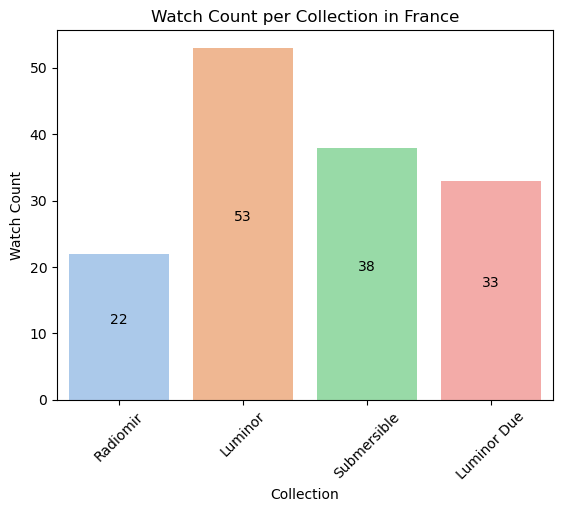

In [238]:
collection_visualization(data, country)

In [239]:
overall_stats, collection_stats = analyze_country(data, country)

#### Identify the cheapest and most expensive product in the whole subset

In [240]:
country = "France"
overall_stats, collection_stats = analyze_country(data, country)

print(f"\nCheapest and most expensive product in {country}:")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']}")


Cheapest and most expensive product in France:
  Cheapest -> Collection: Radiomir, Reference: PAM01383, Price: 5000.0
  Most Expensive -> Collection: Submersible, Reference: PAM01405, Price: 195000.0


#### Identify the cheapest and most expensive product per collection

In [241]:
for stat in collection_stats:
    print(f"Collection: {stat['collection']}")
    print(f"  Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']}")
    print(f"  Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']}")
    print("\n"+"-"*50+"\n")

Collection: Radiomir
  Cheapest -> Reference: PAM01383, Price: 5000.0
  Most Expensive -> Reference: PAM01284, Price: 170000.0

--------------------------------------------------

Collection: Luminor
  Cheapest -> Reference: PAM01623, Price: 5700.0
  Most Expensive -> Reference: PAM01060, Price: 189000.0

--------------------------------------------------

Collection: Submersible
  Cheapest -> Reference: PAM01590, Price: 9700.0
  Most Expensive -> Reference: PAM01405, Price: 195000.0

--------------------------------------------------

Collection: Luminor Due
  Cheapest -> Reference: PAM01248, Price: 7000.0
  Most Expensive -> Reference: PAM01494, Price: 42000.0

--------------------------------------------------



##### x 5.4.2. UK

In [242]:
country = "UK"

In [243]:
number_rows, number_unique_collections, top_collection, number_unique_references, top_reference, collection_list = describe_country(data, country)

# Number of rows
print(f"Number of rows: {number_rows}")
if number_unique_collections == 1:
    print(f"\nThere is a unique collection, named {top_collection}")
else:
    print(f"\nWe have {number_unique_collections} collections, and {top_collection} is the leading one")

# Collections list    
print("\nCatalog of Collections:")
print("\n".join([f"{i+1}. {collection}" for i, collection in enumerate(collection_list)]))

# Distinct products based on Reference
if number_unique_references == 1:
    print(f"\nThere is a unique reference: {top_reference}")
else:
    print(f"\nWe have a Total of {number_unique_references} distinct products, with {top_reference} leading the selection from {data[data['reference'] == top_reference]['collection'].values[0]} collection")

Number of rows: 148

We have 4 collections, and Luminor is the leading one

Catalog of Collections:
1. Radiomir
2. Luminor
3. Submersible
4. Luminor Due

We have a Total of 148 distinct products, with PAM01570 leading the selection from Radiomir collection


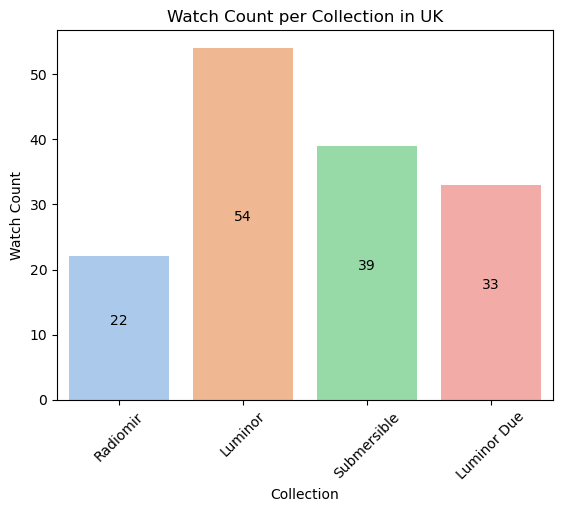

In [244]:
collection_visualization(data, country)

In [173]:
overall_stats, collection_stats = analyze_country(data, country)

In [174]:
print(f"\nCheapest and most expensive product in {country}:")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']}")


Cheapest and most expensive product in UK:
  Cheapest -> Collection: Radiomir, Reference: PAM01383, Price: 4300.0
  Most Expensive -> Collection: Luminor, Reference: PAM00920, Price: 185900.0


In [175]:
for stat in collection_stats:
    print(f"Collection: {stat['collection']}")
    print(f"  Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']}")
    print(f"  Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']}")
    print("\n"+"-"*50+"\n")

Collection: Radiomir
  Cheapest -> Reference: PAM01383, Price: 4300.0
  Most Expensive -> Reference: PAM01284, Price: 117100.0

--------------------------------------------------

Collection: Luminor
  Cheapest -> Reference: PAM01623, Price: 4900.0
  Most Expensive -> Reference: PAM00920, Price: 185900.0

--------------------------------------------------

Collection: Submersible
  Cheapest -> Reference: PAM01590, Price: 8200.0
  Most Expensive -> Reference: PAM01405, Price: 134300.0

--------------------------------------------------

Collection: Luminor Due
  Cheapest -> Reference: PAM01248, Price: 6000.0
  Most Expensive -> Reference: PAM01494, Price: 35500.0

--------------------------------------------------



#### 4.2.3. Japan

In [245]:
country = "Japan"

In [246]:
number_rows, number_unique_collections, top_collection, number_unique_references, top_reference, collection_list = describe_country(data, country)

# Number of rows
print(f"Number of rows: {number_rows}")
if number_unique_collections == 1:
    print(f"\nThere is a unique collection, named {top_collection}")
else:
    print(f"\nWe have {number_unique_collections} collections, and {top_collection} is the leading one")

# Collections list    
print("\nCatalog of Collections:")
print("\n".join([f"{i+1}. {collection}" for i, collection in enumerate(collection_list)]))

# Distinct products based on Reference
if number_unique_references == 1:
    print(f"\nThere is a unique reference: {top_reference}")
else:
    print(f"\nWe have a Total of {number_unique_references} distinct products, with {top_reference} leading the selection from {data[data['reference'] == top_reference]['collection'].values[0]} collection")

Number of rows: 147

We have 4 collections, and Luminor is the leading one

Catalog of Collections:
1. Radiomir
2. Luminor
3. Submersible
4. Luminor Due

We have a Total of 147 distinct products, with PAM01570 leading the selection from Radiomir collection


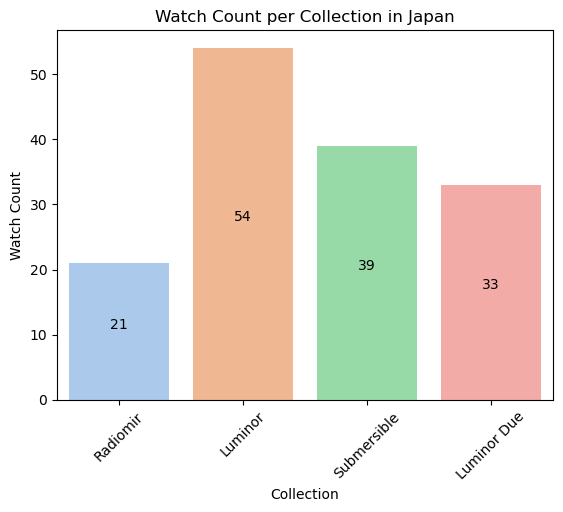

In [247]:
collection_visualization(data, country)

In [248]:
overall_stats, collection_stats = analyze_country(data, country)

In [249]:
print(f"\nCheapest and most expensive product in {country}:")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']}")


Cheapest and most expensive product in Japan:
  Cheapest -> Collection: Radiomir, Reference: PAM01383, Price: 748000.0
  Most Expensive -> Collection: Luminor, Reference: PAM00920, Price: 40271000.0


In [250]:
for stat in collection_stats:
    print(f"Collection: {stat['collection']}")
    print(f"  Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']}")
    print(f"  Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']}")
    print("\n"+"-"*50+"\n")

Collection: Radiomir
  Cheapest -> Reference: PAM01383, Price: 748000.0
  Most Expensive -> Reference: PAM01284, Price: 25355000.0

--------------------------------------------------

Collection: Luminor
  Cheapest -> Reference: PAM01623, Price: 847000.0
  Most Expensive -> Reference: PAM00920, Price: 40271000.0

--------------------------------------------------

Collection: Submersible
  Cheapest -> Reference: PAM01590, Price: 1441000.0
  Most Expensive -> Reference: PAM01405, Price: 29084000.0

--------------------------------------------------

Collection: Luminor Due
  Cheapest -> Reference: PAM01248, Price: 1045000.0
  Most Expensive -> Reference: PAM01494, Price: 6215000.0

--------------------------------------------------



#### 4.2.4. USA

In [251]:
country = "USA"

In [252]:
number_rows, number_unique_collections, top_collection, number_unique_references, top_reference, collection_list = describe_country(data, country)

# Number of rows
print(f"Number of rows: {number_rows}")
if number_unique_collections == 1:
    print(f"\nThere is a unique collection, named {top_collection}")
else:
    print(f"\nWe have {number_unique_collections} collections, and {top_collection} is the leading one")

# Collections list    
print("\nCatalog of Collections:")
print("\n".join([f"{i+1}. {collection}" for i, collection in enumerate(collection_list)]))

# Distinct products based on Reference
if number_unique_references == 1:
    print(f"\nThere is a unique reference: {top_reference}")
else:
    print(f"\nWe have a Total of {number_unique_references} distinct products, with {top_reference} leading the selection from {data[data['reference'] == top_reference]['collection'].values[0]} collection")

Number of rows: 149

We have 4 collections, and Luminor is the leading one

Catalog of Collections:
1. Radiomir
2. Luminor
3. Submersible
4. Luminor Due

We have a Total of 149 distinct products, with PAM01570 leading the selection from Radiomir collection


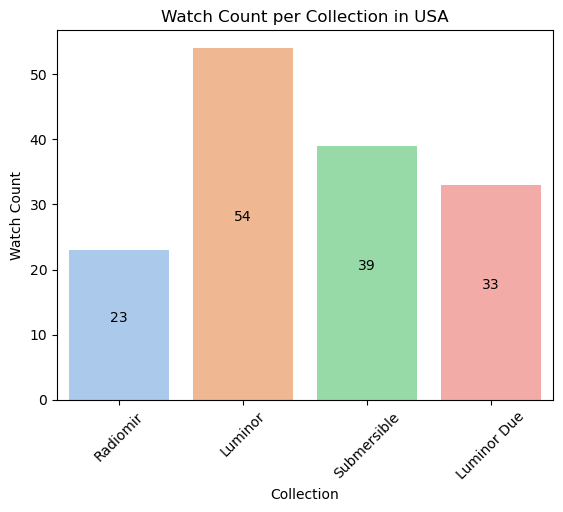

In [253]:
collection_visualization(data, country)

In [254]:
overall_stats, collection_stats = analyze_country(data, country)

In [255]:
print(f"\nCheapest and most expensive product in {country}:")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']}")


Cheapest and most expensive product in USA:
  Cheapest -> Collection: Radiomir, Reference: PAM01383, Price: 4900.0
  Most Expensive -> Collection: Radiomir, Reference: PAM00600, Price: 396800.0


In [256]:
for stat in collection_stats:
    print(f"Collection: {stat['collection']}")
    print(f"  Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']}")
    print(f"  Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']}")
    print("\n"+"-"*50+"\n")

Collection: Radiomir
  Cheapest -> Reference: PAM01383, Price: 4900.0
  Most Expensive -> Reference: PAM00600, Price: 396800.0

--------------------------------------------------

Collection: Luminor
  Cheapest -> Reference: PAM01623, Price: 5600.0
  Most Expensive -> Reference: PAM00920, Price: 232900.0

--------------------------------------------------

Collection: Submersible
  Cheapest -> Reference: PAM01590, Price: 9500.0
  Most Expensive -> Reference: PAM01405, Price: 168200.0

--------------------------------------------------

Collection: Luminor Due
  Cheapest -> Reference: PAM01248, Price: 6900.0
  Most Expensive -> Reference: PAM01494, Price: 41200.0

--------------------------------------------------



In [129]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [188]:
# import requests

# def get_exchange_rate(from_currency: str, to_currency: str) -> float:
#     """
#     Fetches real-time exchange rates using ExchangeRate-API.
    
#     Args:
#         from_currency (str): Base currency (e.g., 'USD').
#         to_currency (str): Target currency (e.g., 'EUR').

#     Returns:
#         float: Exchange rate from 'from_currency' to 'to_currency'.
#     """
#     API_KEY = "af4387cea9cdccb108b76719"  # Get a free API key from https://www.exchangerate-api.com/
#     url = f"https://v6.exchangerate-api.com/v6/{API_KEY}/latest/{from_currency.upper()}"

#     try:
#         response = requests.get(url)
#         response.raise_for_status()  # Raise an error for bad responses (4xx, 5xx)
#         data = response.json()

#         if "conversion_rates" not in data:
#             raise ValueError("Invalid API response")

#         return data["conversion_rates"].get(to_currency.upper(), "Currency not found")

#     except requests.exceptions.RequestException as e:
#         print(f"Network error: {e}")
#     except ValueError as e:
#         print(f"Data error: {e}")

#     return None

In [189]:
# currencies_code = {"$" : "USD", "€": "EUR", "£": "GBP", "￥": "JPN"}

In [230]:
data.head()

,brand,product_url,image_url,collection,reference,price,currency,country,year,name,availability,currencies_code,price_USD,price_EUR,price_GBP,price_JPY
0,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/km...,Radiomir,PAM01570,6000.0,$,USA,2025,Radiomir Quaranta,Available,USD,6000.0,5719.20,4734.60,894272.40
1,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/Ot...,Radiomir,PAM01571,6000.0,$,USA,2025,Radiomir Quaranta,Available,USD,6000.0,5719.20,4734.60,894272.40
2,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/lz...,Radiomir,PAM01572,6000.0,$,USA,2025,Radiomir Quaranta,Available,USD,6000.0,5719.20,4734.60,894272.40
3,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/iY...,Radiomir,PAM01573,6000.0,$,USA,2025,Radiomir Quaranta,Available,USD,6000.0,5719.20,4734.60,894272.40
4,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/bc...,Radiomir,PAM01385,5400.0,$,USA,2025,Radiomir Officine,Out of Stock,USD,5400.0,5147.28,4261.14,804845.16


In [231]:
data.to_csv("gold_data.csv", index=False)

In [259]:
def get_exchange_rate(from_currency: str, to_currency: str) -> float:
    """
    Fetches real-time exchange rates using ExchangeRate-API.
    
    Args:
        from_currency (str): Base currency (e.g., 'USD').
        to_currency (str): Target currency (e.g., 'EUR').

    Returns:
        float: Exchange rate from 'from_currency' to 'to_currency'.
    """
    # Same currency, return 1.0
    if from_currency.upper() == to_currency.upper():
        return 1.0
        
    load_dotenv()

    # Get API key from .env file
    API_KEY = os.getenv("EXCHANGE_API_KEY")
    
    url = f"https://v6.exchangerate-api.com/v6/{API_KEY}/latest/{from_currency.upper()}"

    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        if "conversion_rates" not in data:
            raise ValueError("Invalid API response")
        return data["conversion_rates"].get(to_currency.upper(), None)
    except requests.exceptions.RequestException as e:
        log_error(f"Network error: {e}")
    except ValueError as e:
        log_error(f"Data error: {e}")
    except Exception as e:
        log_error(f"Unexpected error fetching exchange rate: {e}")
    return None


def clean_data(dataframe):
    """
    Cleans the dataset by organizing columns, removing missing values, 
    removing duplicates, and standardizing price values.
    
    Args:
        dataframe (pd.DataFrame): Input DataFrame containing watch product data.
        
    Returns:
        pd.DataFrame: Cleaned DataFrame.
    """
    
    if dataframe.empty:
        return dataframe
      
    # Make a copy to avoid modifying the original
    df = dataframe.copy()
    
    # Define relevant columns and reorder
    column_list_ref = ['brand', 'product_url', 'image_url', 'collection', 
                      'reference', 'price', 'currency', 'country', 'year']
    remaining_columns = [col for col in df.columns if col not in column_list_ref]
    df = df[column_list_ref + remaining_columns]
    
    # Remove rows with missing 'reference' or 'price'
    df.dropna(subset=['reference', 'price'], inplace=True)
    
    # Remove duplicates based on 'reference' and 'country'
    df.drop_duplicates(subset=['reference', 'country'], keep='first', inplace=True)

    # Extract and clean price values
    currencies = df['currency'].unique()
    for currency in currencies:
        df['price'] = df['price'].astype(str).str.replace(currency, '', regex=False)
    df.loc[:, 'price'] = (df['price'].astype(str).str.replace(r'[\s,]', '', regex=True).astype(float))  # # Remove spaces and commas Convert to integer
    
    return df

def transform_data(dataframe, CURRENCIES_CODE):
    """
    Transforms the dataset by mapping currency codes and converting prices 
    to different currencies.
    
    Args:
        dataframe (pd.DataFrame): Cleaned DataFrame.
        CURRENCIES_CODE (dict): Dictionary mapping currency symbols to standard codes.
        
    Returns:
        pd.DataFrame: Transformed DataFrame with currency conversions.
    """
    if dataframe.empty:
        return dataframe
        
    # Make a copy to avoid modifying the original
    df = dataframe.copy()
    
    # Map currency symbols to standard codes
    df["currency_code"] = df["currency"].map(CURRENCIES_CODE)

    # Convert price to all target currencies
    for target_currency in CURRENCIES_CODE.values():
        df[f"price_{target_currency}"] = df.apply(
            lambda row: row["price"] * get_exchange_rate(row["currency_code"], target_currency) if row["currency_code"] in CURRENCIES_CODE.values() else None,
            axis=1
        )
    return df

def preprocess_data(dataframe, CURRENCIES_CODE):
    """
    Cleans and transforms the dataset.
    
    Args:
        dataframe (pd.DataFrame): Input DataFrame containing watch product data.
        CURRENCIES_CODE (dict): Dictionary mapping currency symbols to standard codes.
        
    Returns:
        pd.DataFrame: Processed DataFrame with standardized and converted prices.
    """
    # First clean the data
    cleaned_df = clean_data(dataframe)

    # Then transform the data
    transformed_df = transform_data(cleaned_df, CURRENCIES_CODE)
    
    return transformed_df

In [260]:
dataframe = pd.read_csv("Data&Data - PriceAnalysis Challenge/data/bronze/2025-02-27_15-10-01/all_watches_2025.csv")
CURRENCIES_CODE = {"$": "USD", "€": "EUR", "£": "GBP", "¥": "JPY"}

transformed_df = preprocess_data(dataframe, CURRENCIES_CODE)
print(transformed_df.head())

NameError: name 'load_dotenv' is not defined